# The Sparks Foundation - Data Science & Business Analytics Internship

# Graduate Rotational Internship Program #GRIPFEBRUARY22

# TASK 1 - Prediction using Supervised Machine Learning

In this task it is required to predict the percentage of a student on the basis of number of hours studied using the Linear Regression supervised machine learning algorithm.

# Presenting by Manjesh M

# Step1:  Importing the dataset

In [4]:
#Importing required libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [6]:
#Reading the data from link

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

df.head() #Observation of dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
df.tail(n=6) #gets the last 6 rows

,Hours,Scores
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
df.shape #no of rows and columns

(25, 2)

In [9]:
df.info() #more information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
df.describe() #describes some basic statistical details

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
df.isnull().sum() #returns the number of missing values in the data set

Hours     0
Scores    0
dtype: int64

Implies no NULL values in our dataset

# Step2: Visualizing the dataset

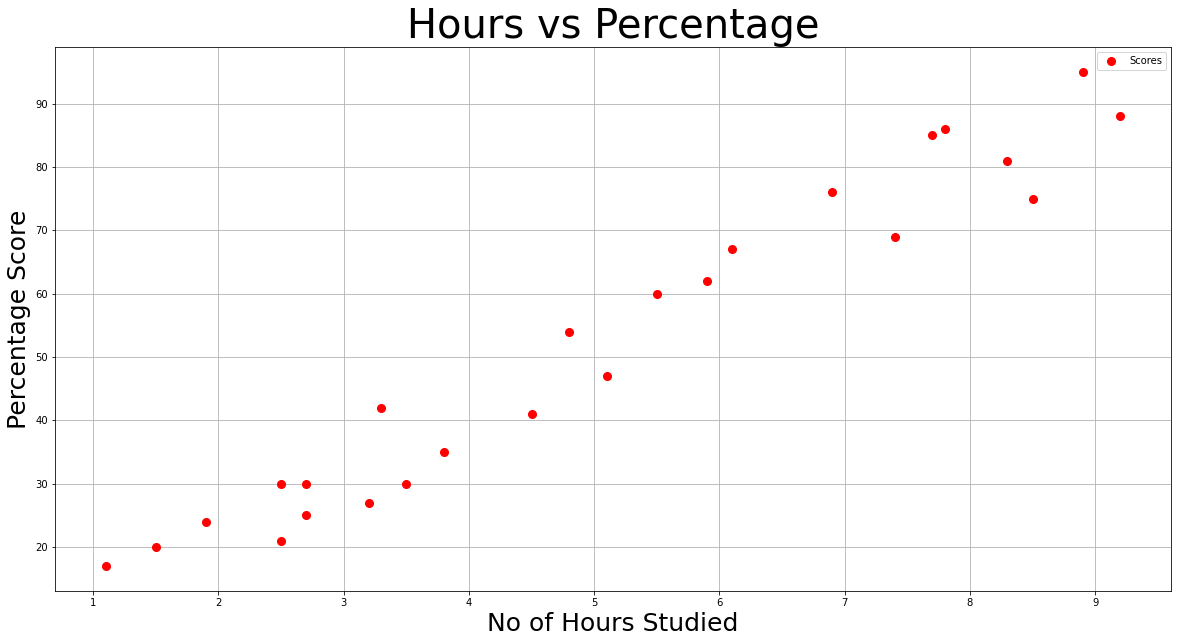

In [65]:
# Plotting the dataset

plt.rcParams["figure.figsize"] = [20,10]
df.plot(x='Hours', y='Scores', style='o', color='red', markersize=8)
plt.title('Hours vs Percentage',fontsize=40)  
plt.xlabel('No of Hours Studied',fontsize=25)  
plt.ylabel('Percentage Score',fontsize=25)  
plt.grid()
plt.show()

Above graph represents linear relationship between "No of Hours Studied vs Percentage Score"

In [26]:
df.corr() #finds the pairwise correlation in the dataframe

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Step3: Data preparation

In [27]:
df.head() #Returns the first 5 rows of the dataframe

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [36]:
#we will select the position based on indexing and divide the data
x = df.iloc[:, :1].values #Hours values
y = df.iloc[:, 1:].values #Scores values

In [37]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [38]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [69]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Step4: Training the Algorithm

In [70]:
from sklearn.linear_model import LinearRegression #importing LinearRegression model from library

model = LinearRegression()  
model.fit(x_train, y_train)

LinearRegression()

# Step5: Visualizing the model

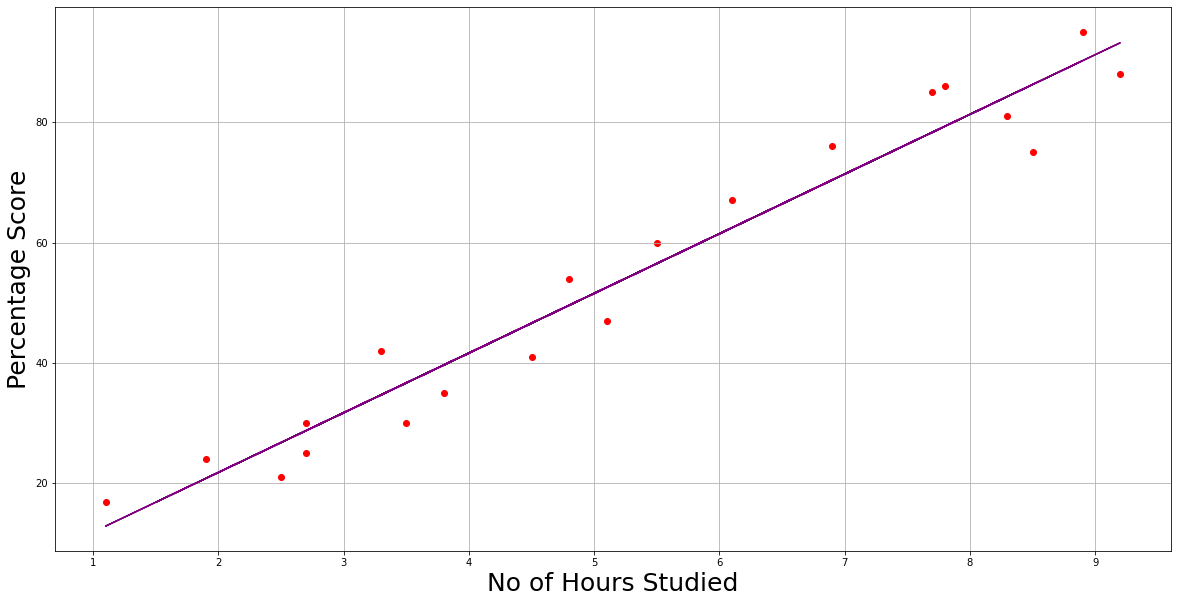

In [71]:
line = model.coef_*x + model.intercept_

plt.rcParams["figure.figsize"] = [20,10]
plt.scatter(x_train, y_train, color='red')
plt.plot(x, line, color='purple');  
plt.xlabel('No of Hours Studied',fontsize=25)  
plt.ylabel('Percentage Score',fontsize=25)  
plt.grid()
plt.show()

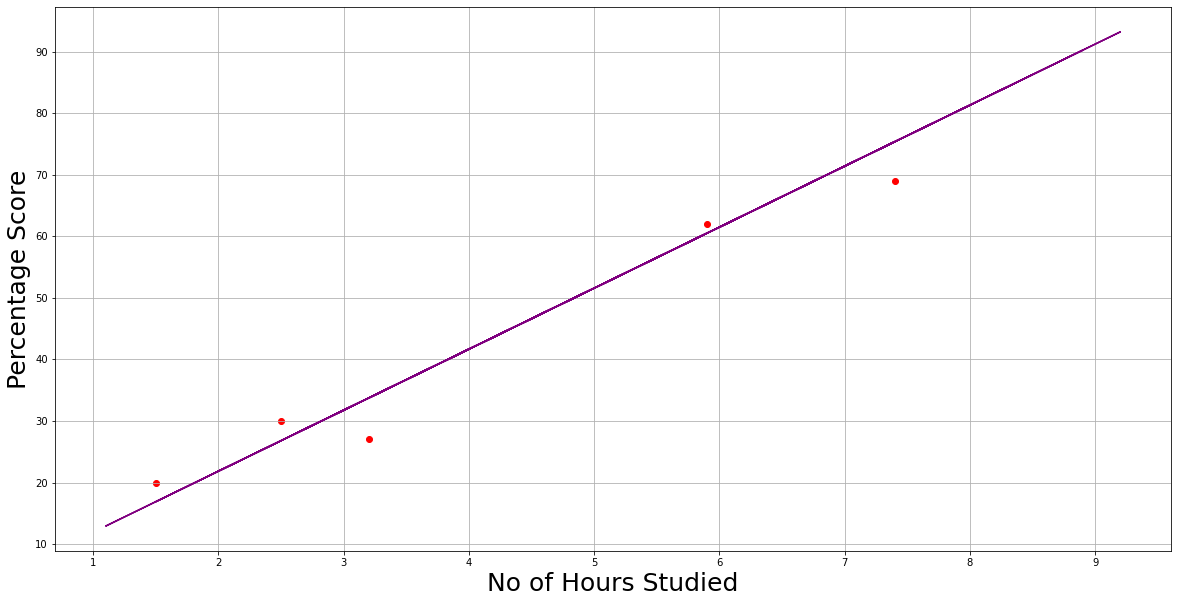

In [72]:
# Plotting for the testing data

plt.rcParams["figure.figsize"] = [20,10]
plt.scatter(x_test, y_test, color='red')
plt.plot(x, line, color='purple');
plt.xlabel('No of Hours Studied',fontsize=25)  
plt.ylabel('Percentage Score',fontsize=25)  
plt.grid()
plt.show()

# Step6: Making Predictions

In [73]:
print(x_test)                   #Testing data in Hours
y_pred = model.predict(X_test)  #scores Prediction

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [75]:
#actual data
print(y_test) 

[[20]
 [27]
 [69]
 [30]
 [62]]


In [76]:
#predicted data
print(y_pred) 

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [91]:
comp = pd.DataFrame({ 'Actual':[y_test], 'Predicted':[y_pred] }) # Comparing Actual vs Predicted
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [97]:
hours = 9.25                        #Prediction for our own dataset say 9.25/day
opred = model.predict([[hours]])    #returns the output tensor
print("If a person studies for",hours,"hours, Predicted score is",opred[0])

If a person studies for 9.25 hours, Predicted score is [93.69173249]


# Step7: Evaluating the model

In [99]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) #absolute error regression loss

Mean Absolute Error: 4.183859899002975


# Thank you